## Zoo dataset

Classes:
1. Mammal
2. Bird
3. Reptile
4. Fish
5. Amphibian
6. Bug
7. Invertebrate

**Задача построить pairplot, показать взаймосвязь между признаками, построить график границ используя KNN classifier**

### Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

### Get Data

In [5]:
df = pd.read_csv('zoo.data')

attrs = ['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

df.columns = attrs # add column names

df.drop(['name'], axis=1, inplace=True) # drop column name because it is string, aslo we don't need it

X = df.drop(['type'], axis=1)
y = df['type']

df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


### Data Visualisation

Чтобы понять связь между признаками классов строим pairplot

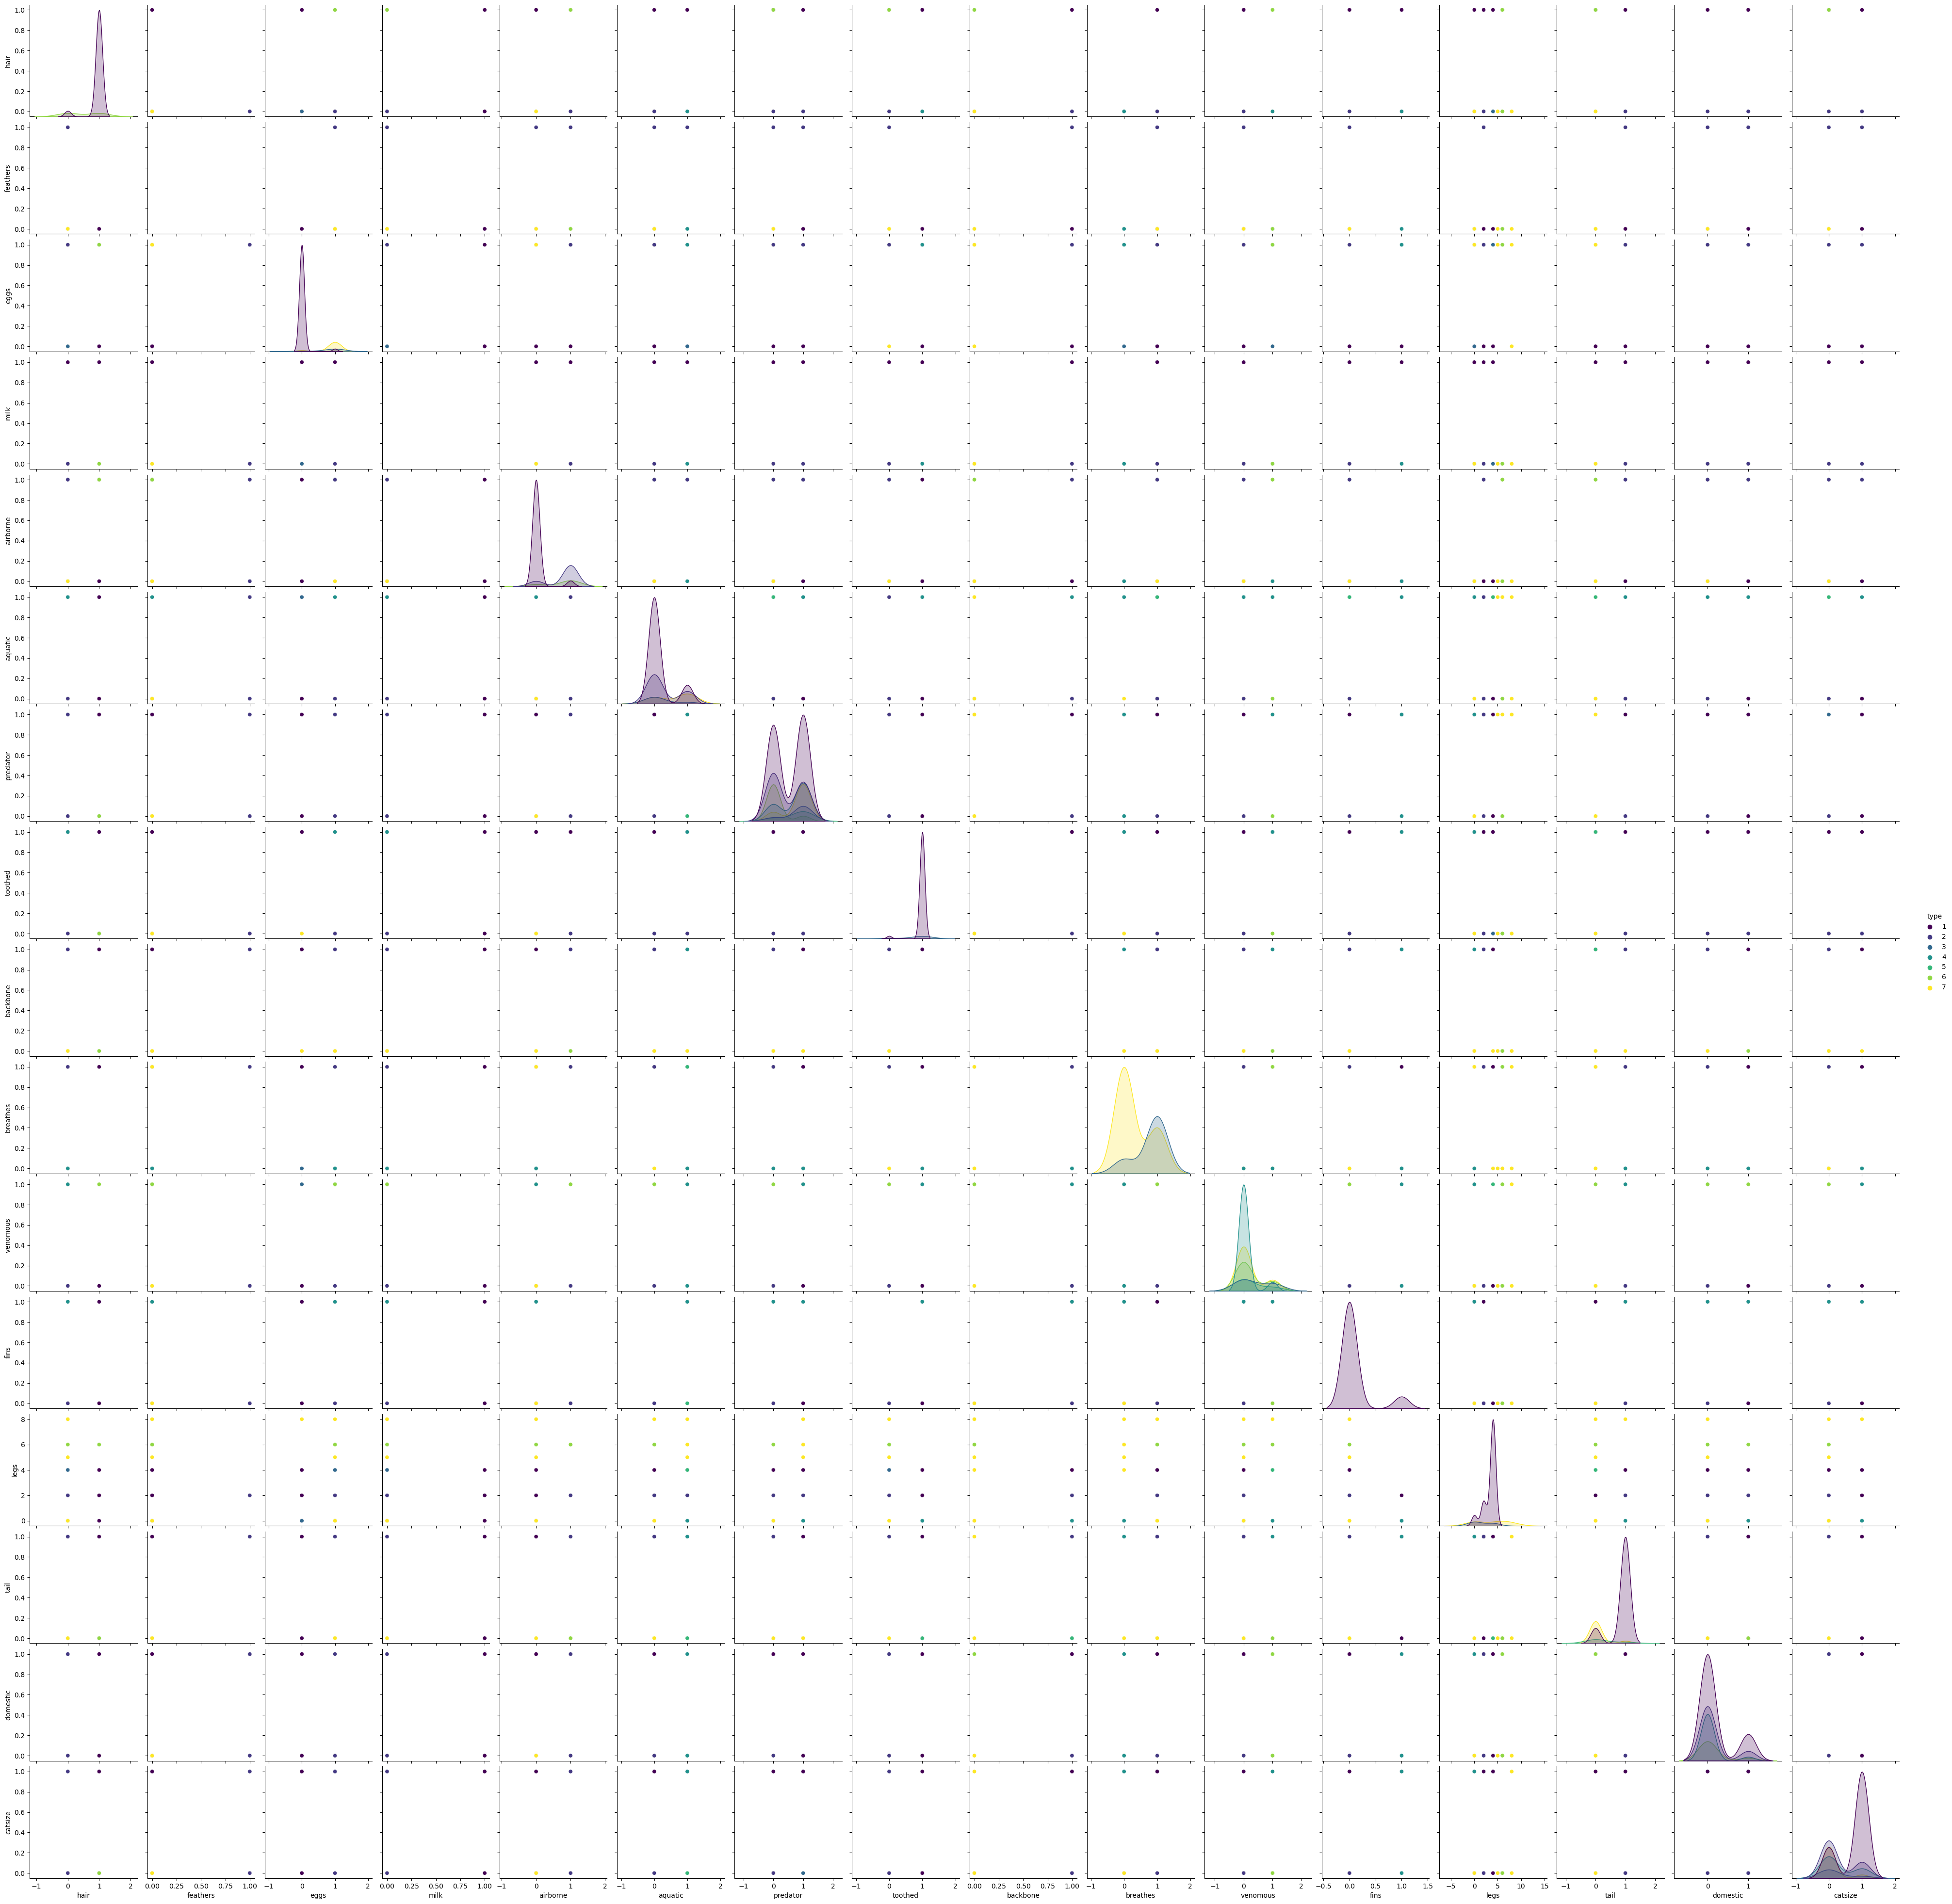

In [32]:
sns.pairplot(data=df, hue='type', palette='viridis')

В pairplotе можно визуально оценить, как различные классы распределены относительно друг друга на scatter plots. Это позволяет увидеть, есть ли явные разделения или закономерности между классами на основе пар признаков.
Напимер, класс bird не имеет волос, но имеею перья. Млекопитающие в большинстве случаев имеют волосы, могут быть домашними, многие из них дышат и т. д.
Bugs имееют airbone, hair и являются яйцекладущими.
У 7-го класса нет хвостов, волос и костей.

Выводим корреляцию данных

<Axes: >

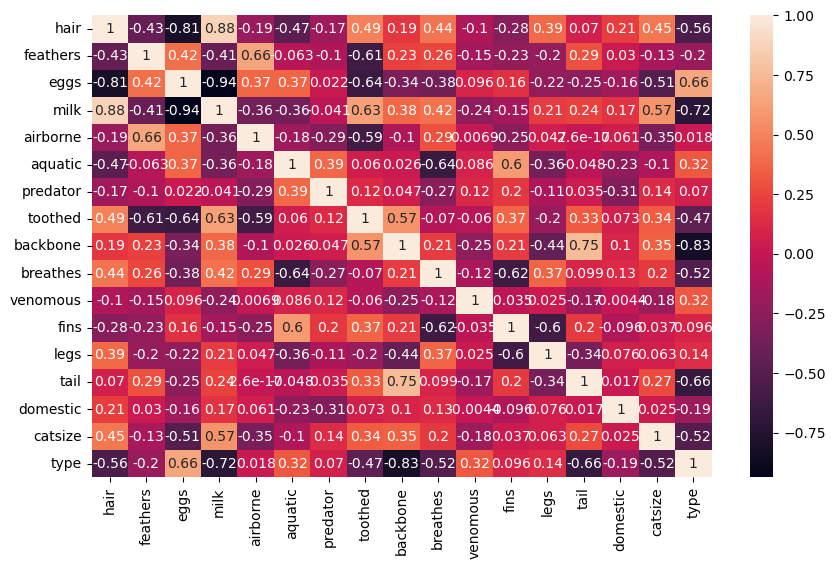

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

Оценка корреляции между прогнозируемым классом 'type' и другими признаками.

<Axes: >

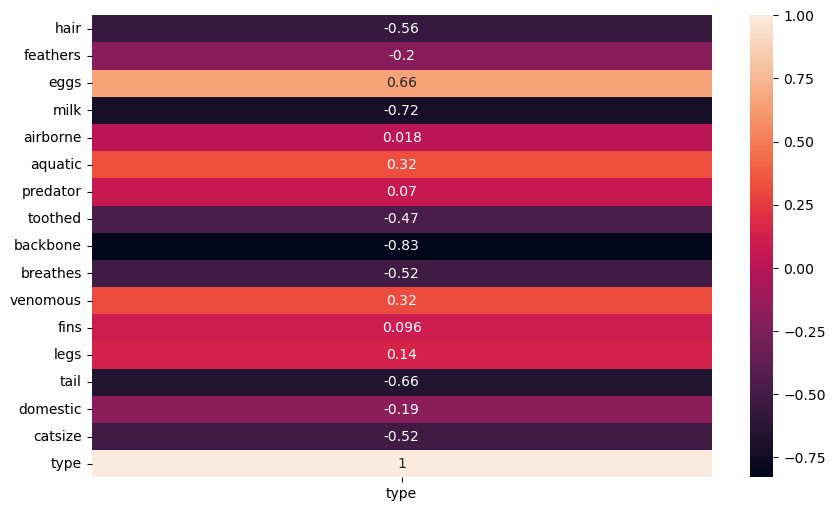

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()[['type']], annot=True)

Наблюдается сильная корреляция между наличием волос и способностью животных вырабатывать молоко, а также отрицательная корреляция с наличием eggs. Это указывает на то, что животные с шерстью обычно не являются яйцекладущими, но, вероятно, относятся к классу млекопитающих (класс 1). Они обычно имеют размер схожий с кошачьим, покрыты волосами, но не обладают перьями. 

### KNN 

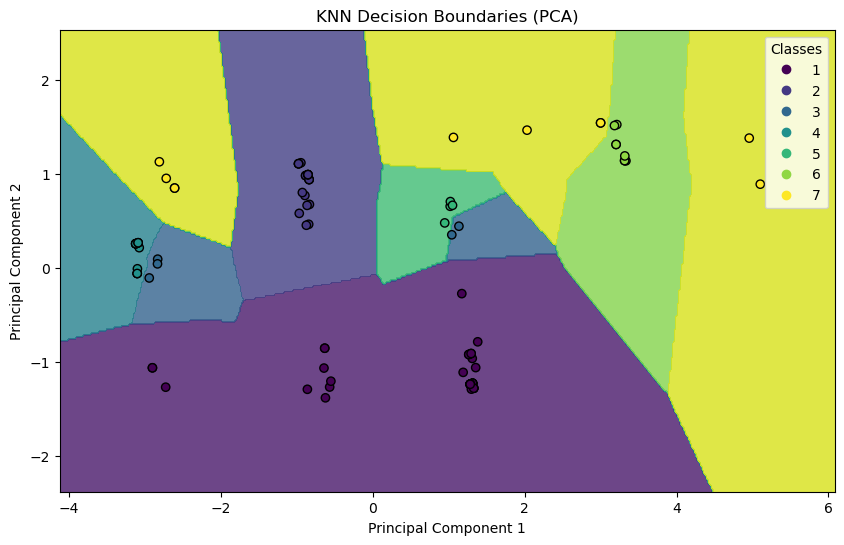

In [38]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and fit a KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Plot the decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries (PCA)')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()


Визуализация дает представление о том, как классификатор KNN разделяет разные классы в сокращенном пространстве признаков как для обучающих, так и для тестовых наборов. 

Как мы видим, KNN хорошо предсказывает зоо датасет, более точно разделяя все классы.